In [442]:
import cv2
from jetcam.csi_camera import CSICamera
import ipywidgets
from ipywidgets import Video
import IPython
from jetcam.utils import bgr8_to_jpeg
import time
import Jetson.GPIO as GPIO
import PIL.Image

In [443]:
#backSub = cv2.createBackgroundSubtractorMOG2()
backSub = cv2.createBackgroundSubtractorKNN()

In [444]:
camera = CSICamera(width=820, height=616, capture_device=0, fps=5, enforce_fps=True) # confirm the capture_device number

In [445]:
belt_pin = 12
GPIO.setmode(GPIO.BOARD)
GPIO.setup(belt_pin, GPIO.OUT, initial=GPIO.HIGH)

In [446]:
image = camera.read()

In [447]:
image_widget = ipywidgets.Image(format='jpeg')
image_widget.value = bgr8_to_jpeg(image)
IPython.display.display(image_widget)

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x0…

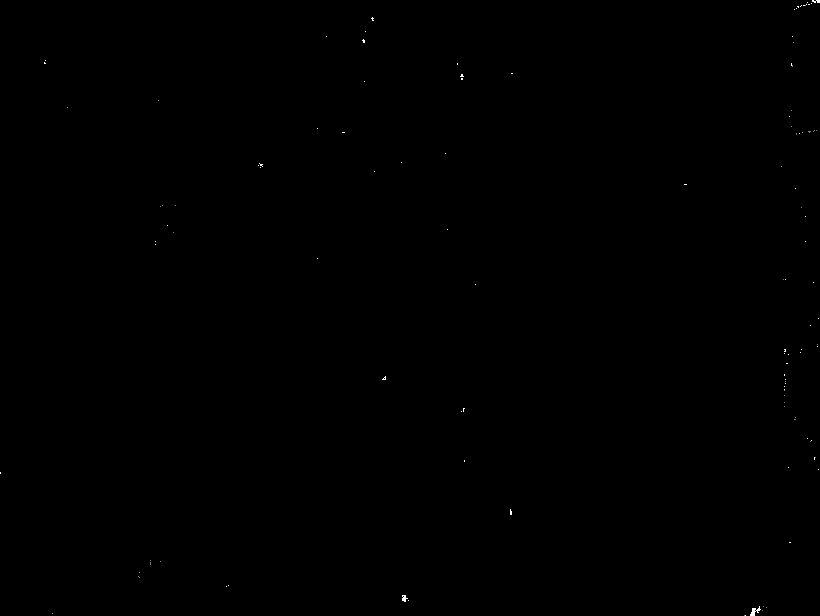

In [448]:
camera.running = True

def update_image(change):
    image = change['new']
    image_widget.value = bgr8_to_jpeg(image)
    
    fgMask = backSub.apply(image)
    
    mask_widget = PIL.Image.fromarray(fgMask)
    IPython.display.display(mask_widget)
    IPython.display.clear_output(wait=True)
       
camera.observe(update_image, names='value')


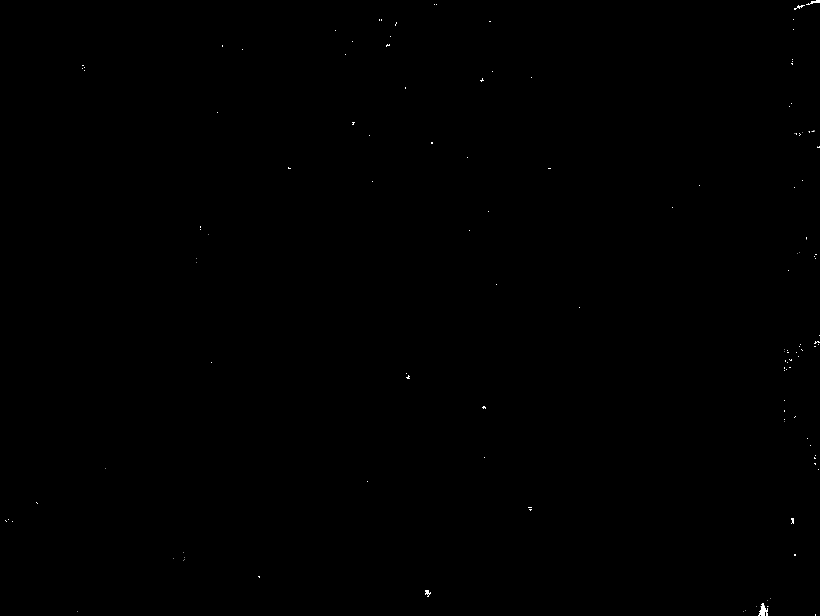

In [449]:
belt_pin = 12
GPIO.setmode(GPIO.BOARD)
GPIO.setup(belt_pin, GPIO.OUT, initial=GPIO.HIGH)

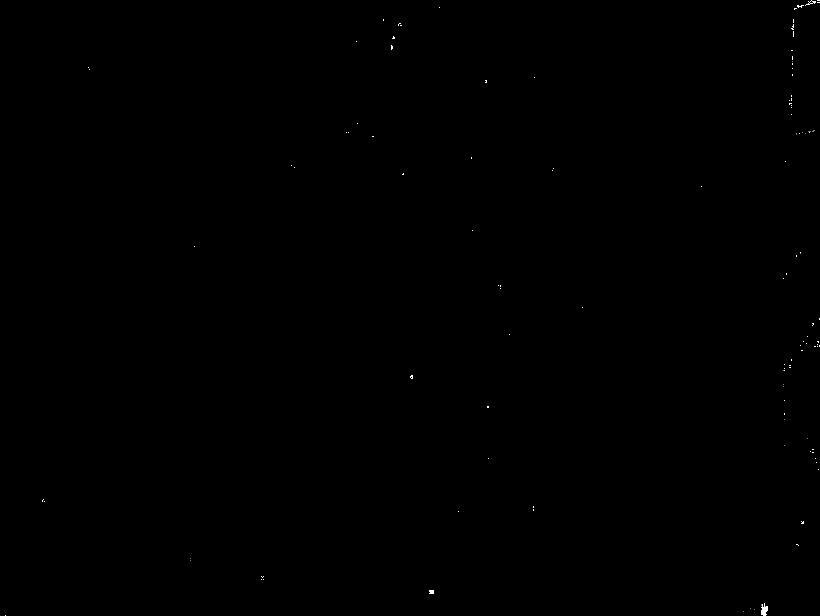

In [450]:
# Attention!  Execute this cell before moving to another notebook
# The USB camera application only requires that the notebook be reset
# The CSI camera application requires that the 'camera' object be specifically released


camera.running = False
camera.cap.release()


In [451]:

GPIO.output(belt_pin, GPIO.LOW)
GPIO.cleanup()